## Import Libraries

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

## Request for the HTML response using the URL

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


## Parse data from the HTML

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

## Convert table to DataFrame

In [4]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
df

,Rank,City,Population(2011)[3],Population(2001),State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bangalore,8425970,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat
...,...,...,...,...,...
318,319,Tezpur,102505,83028,Assam
319,320,Jehanabad[35],102456,81503,Bihar
320,321,Aurangabad[36],101520,79393,Bihar
321,322,Gangtok,100286,29354,Sikkim


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Clean the Data

In [6]:
# drop the unwanted columns
df = df.drop(["Rank", "Population(2001)"], axis=1)
df

,City,Population(2011)[3],State or union territory
0,Mumbai,12442373,Maharashtra
1,Delhi,11007835,Delhi
2,Bangalore,8425970,Karnataka
3,Hyderabad,6809970,Telangana
4,Ahmedabad,5570585,Gujarat
...,...,...,...
318,Tezpur,102505,Assam
319,Jehanabad[35],102456,Bihar
320,Aurangabad[36],101520,Bihar
321,Gangtok,100286,Sikkim


In [7]:
# rename columns for ease
df = df.rename(columns={"State or union territory": "State","Population(2011)[3]": "Population"})
df

,City,Population,State
0,Mumbai,12442373,Maharashtra
1,Delhi,11007835,Delhi
2,Bangalore,8425970,Karnataka
3,Hyderabad,6809970,Telangana
4,Ahmedabad,5570585,Gujarat
...,...,...,...
318,Tezpur,102505,Assam
319,Jehanabad[35],102456,Bihar
320,Aurangabad[36],101520,Bihar
321,Gangtok,100286,Sikkim


In [8]:
df.head()

,City,Population,State
0,Mumbai,12442373,Maharashtra
1,Delhi,11007835,Delhi
2,Bangalore,8425970,Karnataka
3,Hyderabad,6809970,Telangana
4,Ahmedabad,5570585,Gujarat


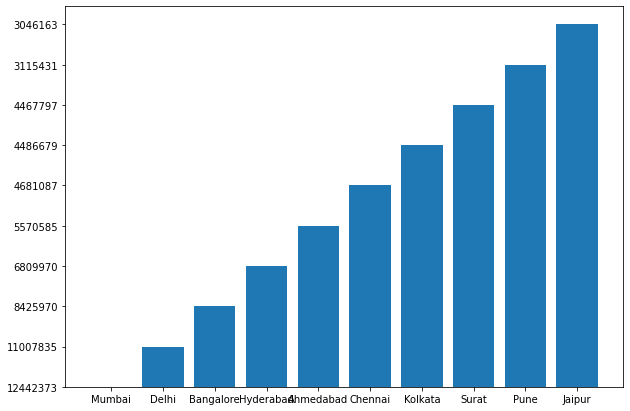

In [9]:
City = df['City'].head(12)
Population = df['Population'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(City[0:10], Population[0:10])
 
# Show Plot
plt.show()